In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [4]:
#----------DAY-1----------Create dataset+python basic
np.random.seed(42)

In [10]:
data = {
    "age": np.random.randint(20, 31, 40),            
    "salary": np.random.randint(20000, 300001, 40),
    "experience": np.random.randint(0, 11, 40),         
    "department": np.random.choice(['HR', 'SALES', 'IT'], 40),
    "performance_score": np.random.randint(20, 101, 40)
}

In [17]:
df = pd.DataFrame(data)
print("----------dataset(DAY-1)loaded----------")
print(df.head())
print("----------INFO----------")
print(df.info())
print("----------Describe----------")
print(df.describe())


----------dataset(DAY-1)loaded----------
   age  salary  experience department  performance_score
0   26  276840           8         HR                 81
1   23  161699           0         HR                 94
2   30  290936           8      SALES                 81
3   27  259931           6         IT                 20
4   24  259629           8         IT                 46
----------INFO----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                40 non-null     int32 
 1   salary             40 non-null     int32 
 2   experience         40 non-null     int32 
 3   department         40 non-null     object
 4   performance_score  40 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1.1+ KB
None
----------Describe----------
            age         salary  experience  performance_score
count  40.00000

In [21]:
print("----------Handle Missing Value DAY-2----------")
df.loc[3,'salary']=np.nan
df.loc[7,'experience']=np.nan
print("----------Misiing Value Find----------")
print(df.isnull().sum())
df["salary"].fillna(df["salary"].mean(), inplace=True)
df["experience"].fillna(df["experience"].median(), inplace=True)

print("\nAfter Filling Missing Values:")
print(df.isnull().sum())

----------Handle Missing Value DAY-2----------
----------Misiing Value Find----------
age                  0
salary               1
experience           1
department           0
performance_score    0
dtype: int64

After Filling Missing Values:
age                  0
salary               0
experience           0
department           0
performance_score    0
dtype: int64


C:\Users\mohsi\AppData\Local\Temp\ipykernel_34292\594365850.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["salary"].fillna(df["salary"].mean(), inplace=True)
C:\Users\mohsi\AppData\Local\Temp\ipykernel_34292\594365850.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

----------Visualization DAY-3----------


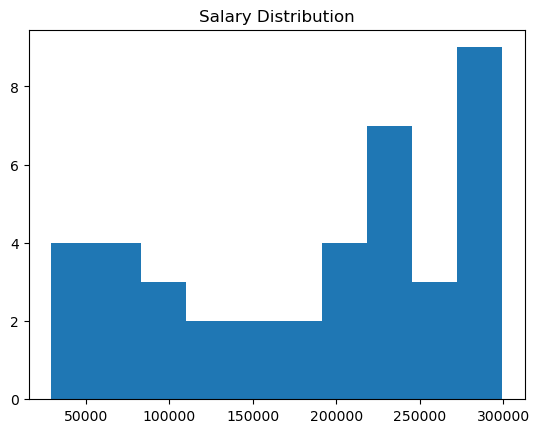

In [23]:
print("----------Visualization DAY-3----------")

plt.figure()
plt.hist(df["salary"])
plt.title("Salary Distribution")
plt.show()

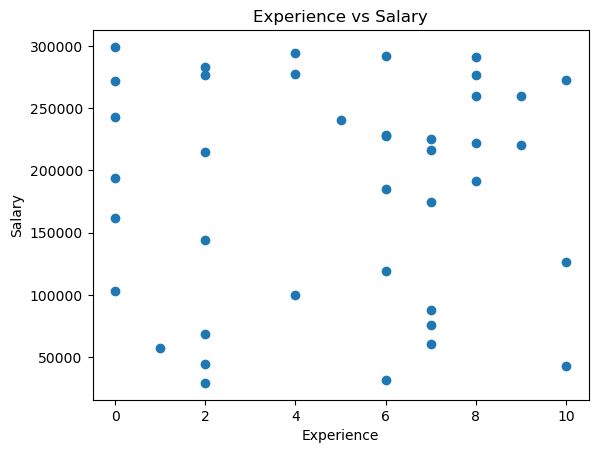

In [24]:
plt.figure()
plt.scatter(df["experience"], df["salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()


In [25]:
print("----------Numpy Operation DAY-4----------")
salary_np = df["salary"].values

print("Mean Salary:", np.mean(salary_np))
print("STD Salary:", np.std(salary_np))

reshaped_salary = salary_np.reshape(-1, 1)
print("Reshaped Salary Shape:", reshaped_salary.shape)

----------Numpy Operation DAY-4----------
Mean Salary: 184816.15384615384
STD Salary: 87205.2570168618
Reshaped Salary Shape: (40, 1)


In [26]:
print("---------- Scaling & Encoding DAY-5 ----------")

df_encoded = pd.get_dummies(df, columns=["department"], drop_first=True)
print(df_encoded.head())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    df_encoded[["age", "salary", "experience"]]
)

---------- Scaling & Encoding DAY-5 ----------
   age         salary  experience  performance_score  department_IT  \
0   26  276840.000000         8.0                 81          False   
1   23  161699.000000         0.0                 94          False   
2   30  290936.000000         8.0                 81          False   
3   27  184816.153846         6.0                 20           True   
4   24  259629.000000         8.0                 46           True   

   department_SALES  
0             False  
1             False  
2              True  
3             False  
4             False  


In [27]:
print("----------Train-Test Split & Pipeline DAY-6----------")

X = df_encoded.drop("performance_score", axis=1)
y = df_encoded["performance_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("scaler", StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

print("Train Shape:", X_train_scaled.shape)
print("Test Shape:", X_test_scaled.shape)

----------Train-Test Split & Pipeline DAY-6----------
Train Shape: (32, 5)
Test Shape: (8, 5)


In [28]:
print("----------Final Analysis DAY-7----------")

print("Correlation Matrix:")
print(df_encoded.corr())

print("\nFinal Dataset Preview:")
print(df_encoded.head())

print("\nWEEK 1 COMPLETED SUCCESSFULLY")

----------Final Analysis DAY-7----------
Correlation Matrix:
                        age    salary  experience  performance_score  \
age                1.000000  0.158439   -0.175546           0.216245   
salary             0.158439  1.000000    0.048692           0.083870   
experience        -0.175546  0.048692    1.000000           0.147365   
performance_score  0.216245  0.083870    0.147365           1.000000   
department_IT      0.126742  0.091083    0.060284           0.088864   
department_SALES   0.040402  0.199578   -0.077455          -0.141913   

                   department_IT  department_SALES  
age                     0.126742          0.040402  
salary                  0.091083          0.199578  
experience              0.060284         -0.077455  
performance_score       0.088864         -0.141913  
department_IT           1.000000         -0.502865  
department_SALES       -0.502865          1.000000  

Final Dataset Preview:
   age         salary  experience  perf